# 岭回归

In [16]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from numpy import *

### 加载数据

In [6]:
def loadDataSet(fileName):                 
    """ 加载数据
        解析以tab键分隔的文件中的浮点数
    Returns：
        dataMat ：  feature 对应的数据集
        labelMat ： feature 对应的分类标签，即类别标签

    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr =[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [1]:
def ridgeRegres(xMat, yMat, lam=0.2):
    '''
        Desc：
            这个函数实现了给定 lambda 下的岭回归求解。
            如果数据的特征比样本点还多，就不能再使用上面介绍的的线性回归和局部现行回归了，因为计算 (xTx)^(-1)会出现错误。
            如果特征比样本点还多（n > m），也就是说，输入数据的矩阵x不是满秩矩阵。非满秩矩阵在求逆时会出现问题。
            为了解决这个问题，我们下边讲一下：岭回归，这是我们要讲的第一种缩减方法。
        Args：
            xMat：样本的特征数据，即 feature
            yMat：每个样本对应的类别标签，即目标变量，实际值
            lam：引入的一个λ值，使得矩阵非奇异
        Returns：
            经过岭回归公式计算得到的回归系数
    '''

    xTx = xMat.T * xMat
    # 岭回归就是在矩阵 xTx 上加一个 λI 从而使得矩阵非奇异，进而能对 xTx + λI 求逆
    denom = xTx + eye(shape(xMat)[1]) * lam
    # 检查行列式是否为零，即矩阵是否可逆，行列式为0的话就不可逆，不为0的话就是可逆。
    if linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws


In [2]:
def ridgeTest(xArr, yArr):
    '''
        Desc：
            函数 ridgeTest() 用于在一组 λ 上测试结果
        Args：
            xArr：样本数据的特征，即 feature
            yArr：样本数据的类别标签，即真实数据
        Returns：
            wMat：将所有的回归系数输出到一个矩阵并返回
    '''

    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 计算Y的均值
    yMean = mean(yMat, 0)
    # Y的所有的特征减去均值
    yMat = yMat - yMean
    # 标准化 x，计算 xMat 平均值
    xMeans = mean(xMat, 0)
    # 然后计算 X的方差
    xVar = var(xMat, 0)
    # 所有特征都减去各自的均值并除以方差
    xMat = (xMat - xMeans) / xVar
    # 可以在 30 个不同的 lambda 下调用 ridgeRegres() 函数。
    numTestPts = 30
    # 创建30 * m 的全部数据为0 的 矩阵
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        # exp() 返回 e^x
        ws = ridgeRegres(xMat, yMat, exp(i - 10))
        wMat[i, :] = ws.T
    return wMat

In [3]:
# test for ridgeRegression
def regression3():
    abX, abY = loadDataSet("8.Regression/abalone.txt")
    ridgeWeights = ridgeTest(abX, abY)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ridgeWeights)
    plt.show()

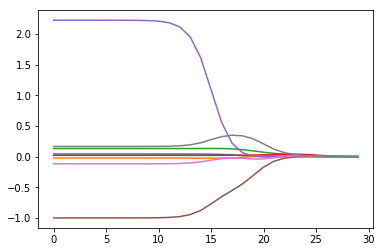

In [9]:
regression3()

In [7]:
abX, abY = loadDataSet("8.Regression/abalone.txt")

In [8]:
array(abX).shape

(4177, 8)

In [8]:
# 是m·m ???
xMat = mat(abX)
yMat = mat(abY).T
xTx = xMat.T * xMat
shape(xTx)

(8, 8)

In [12]:
ridgeWeights = ridgeTest(abX, abY)
ridgeWeights.shape

(30, 8)

In [14]:
type(zeros(3))

numpy.ndarray

In [17]:
pd.DataFrame(ridgeWeights)

,0,1,2,3,4,5,6,7
0,0.043044,-0.022742,0.132141,0.020752,2.224037,-0.998953,-0.117254,0.166229
1,0.043044,-0.022742,0.132141,0.020752,2.224036,-0.998953,-0.117254,0.166229
2,0.043044,-0.022742,0.132141,0.020752,2.224033,-0.998952,-0.117254,0.166230
3,0.043044,-0.022742,0.132141,0.020752,2.224024,-0.998950,-0.117254,0.166231
4,0.043044,-0.022742,0.132141,0.020752,2.224001,-0.998946,-0.117252,0.166233
5,0.043044,-0.022742,0.132141,0.020752,2.223936,-0.998933,-0.117249,0.166239
6,0.043044,-0.022742,0.132141,0.020752,2.223760,-0.998898,-0.117239,0.166257
7,0.043043,-0.022743,0.132143,0.020752,2.223283,-0.998804,-0.117214,0.166304
8,0.043041,-0.022746,0.132145,0.020753,2.221987,-0.998548,-0.117145,0.166431
9,0.043035,-0.022753,0.132153,0.020754,2.218472,-0.997852,-0.116958,0.166778
